In [3]:
%pip install netCDF4 xarray cartopy cftime

# Standard data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Mapping libraries
%apt-get install libgeos-dev
%pip install basemap

Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%apt-get` not found.


Load different datasets (microplastics and environmental variables) 

In [4]:
import xarray as xr
mp_data = xr.open_dataset('/Users/autinauyeung/satellite-microplastic-research/satellite-microplastic-research/data/microplastic/cyg.ddmi.s20180816-120000-e20180816-120000.l3.grid-microplastic.a32.d33.nc')
heatflux_data = xr.open_dataset('/Users/autinauyeung/satellite-microplastic-research/satellite-microplastic-research/data/heatflux/cyg.ddmi.s20180816-000000-e20180816-235959.l2.surface-flux.a32.d33.nc', decode_times=False)

/Users/autinauyeung/satellite-microplastic-research/satellite-microplastic-research/venv/lib/python3.13/site-packages/xarray/coding/times.py:206: SerializationWarning: Ambiguous reference date string: 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0000:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)


In [5]:
import pandas as pd

mp_df = mp_data.to_dataframe().reset_index()
heatflux_df = heatflux_data.to_dataframe().reset_index()

In [6]:
mp_df.head(-10)

,lat,lon,time,num_mp_samples,stddev_mp_samples,mp_concentration
0,-37.0,0.00,2018-08-16 12:00:00,817.0,0.135344,12866.504883
1,-37.0,0.25,2018-08-16 12:00:00,814.0,0.130202,12746.297852
2,-37.0,0.50,2018-08-16 12:00:00,812.0,0.125060,12626.090820
3,-37.0,0.75,2018-08-16 12:00:00,810.0,0.119918,12505.883789
4,-37.0,1.00,2018-08-16 12:00:00,808.0,0.114776,12385.675781
...,...,...,...,...,...,...
427665,37.0,356.25,2018-08-16 12:00:00,NaN,NaN,NaN
427666,37.0,356.50,2018-08-16 12:00:00,NaN,NaN,NaN
427667,37.0,356.75,2018-08-16 12:00:00,NaN,NaN,NaN
427668,37.0,357.00,2018-08-16 12:00:00,10.0,0.103038,13317.067383


In [7]:
mp_df.dtypes

lat                         float32
lon                         float32
time                 datetime64[ns]
num_mp_samples              float64
stddev_mp_samples           float32
mp_concentration            float32
dtype: object

In [8]:
heatflux_df.head(-10)

,sample,spacecraft_id,spacecraft_num,antenna,prn_code,sample_time,lat,lon,air_density,air_temperature,...,shf,lhf_yslf,shf_yslf,lhf_uncertainty,shf_uncertainty,lhf_yslf_uncertainty,shf_yslf_uncertainty,cygnss_l2_sample_index,quality_flags,solar_time
0,0,54.0,6.0,2.0,25.0,0.000000e+00,-31.641535,253.339890,1.229120,288.119110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,633.0,60539.519531
1,1,249.0,2.0,3.0,18.0,1.300000e-07,8.707554,114.447792,1.150128,301.281708,...,0.921451,106.377144,0.967231,29.486685,7.988684,38.986294,8.065699,1,0.0,27204.300781
2,2,249.0,2.0,3.0,1.0,1.300000e-07,6.900025,113.416763,1.150595,301.247559,...,1.911258,50.061333,2.255873,20.997229,9.198762,27.194637,9.739216,2,0.0,26956.849609
3,3,249.0,2.0,3.0,11.0,1.300000e-07,8.681652,112.699303,1.150088,301.313507,...,3.696332,128.988190,4.420454,30.304657,10.449785,43.909534,11.312735,3,0.0,26784.660156
4,4,247.0,1.0,3.0,24.0,2.210000e-07,6.879234,313.513184,1.168655,300.050568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,633.0,74980.976562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529170,529170,44.0,4.0,3.0,18.0,8.639650e+04,-2.863884,123.838104,1.160297,299.710815,...,7.465333,114.658691,7.749488,30.630527,11.970849,40.789486,12.818808,529170,0.0,29466.900391
529171,529171,43.0,3.0,2.0,17.0,8.639650e+04,14.688744,84.305420,1.150142,299.737976,...,17.462570,97.802567,15.602831,30.505684,14.108242,38.790035,14.980058,529171,0.0,19978.970703
529172,529172,249.0,2.0,2.0,3.0,8.639650e+04,-27.635605,157.368118,1.191412,294.223297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529172,625.0,37514.371094
529173,529173,43.0,3.0,3.0,11.0,8.639650e+04,18.034569,90.283714,1.145335,300.296967,...,24.573042,401.451569,53.528259,39.899342,15.071368,103.234619,25.164042,529173,0.0,21413.750000


In [9]:
heatflux_df.dtypes

sample                        int32
spacecraft_id               float32
spacecraft_num              float32
antenna                     float32
prn_code                    float32
sample_time                 float64
lat                         float32
lon                         float32
air_density                 float32
air_temperature             float32
boundry_layer_height        float32
dew_point_temperature       float32
surface_pressure            float32
surface_skin_temperature    float32
lhf                         float32
shf                         float32
lhf_yslf                    float32
shf_yslf                    float32
lhf_uncertainty             float32
shf_uncertainty             float32
lhf_yslf_uncertainty        float32
shf_yslf_uncertainty        float32
cygnss_l2_sample_index        int32
quality_flags               float32
solar_time                  float32
dtype: object

In [10]:
"""
Microplastic Concentration Variables
------------------------------------
## MAJOR VARIABLES
lat	latitude	degrees_north
lon	longitude	degrees_east
mp_concentration	Microplastic Concentration	count km-2
num_mp_samples	Number of microplastic concentration samples within spatiotemporal bin	1
time	time	days since 1970-01-01 00:00:00 UTC

## MISC DATA
stddev_mp_samples	Geometric standard deviation of microplastic concentration samples within spatiotemporal bin	1



Heat Flux Variables
-------------------
## MAJOR VARIABLE
lhf	Latent heat flux calculated from L2 FDS wind speed	W m-2 #key variables driving ocean evaporation and wind pattersn
shf	Sensible heat flux calculated from L2 FDS wind speed	W m-2
lon	Longitude	degrees_east
lat	Latitude	degrees_north
surface_pressure	Surface pressure	Pa
surface_skin_temperature	Surface skin temperature	K
sample_time	Sample time	seconds since 2018-08-02 00:00:00.999

## MINOR VARIABLE
air_density	Air density at surface	kg m-3
air_temperature	10 meter air temperature	K # higher temperature may affect microplastic breakdown
boundry_layer_height	Boundry Layer Height	m
dew_point_temperature	Dew Point Temperature	K

## UNCERTAINTY DATA
lhf_uncertainty	Latent heat flux uncertainty	W m-2
lhf_yslf	Latent heat flux calculated from YSLF wind speed product.	W m-2
lhf_yslf_uncertainty	Latent heat flux YSLF uncertainty	W m-2
shf_uncertainty	Sensible heat flux uncertainty	W m-2
shf_yslf	Sensible heat flux calculated from YSLF wind speed product.	W m-2
shf_yslf_uncertainty	Sensible heat flux YSLF uncertainty	W m-2

## MISC DATA
quality_flags	Per-sample quality flags - helpful for filtering out unreliable data
solar_time	Solar time	seconds since 00:00:00

## UNRELATED VARAIBLES
antenna	Receive antenna	1
cygnss_l2_sample_index	CYGNSS L2 netCDF Sample Index
prn_code	GPS PRN code	1
sample	Sample index	1
spacecraft_id	CCSDS spacecraft identifier	1
spacecraft_num	CYGNSS spacecraft number	1

Wind Speed Variables
---------------------
## MAJOR VARIABLE
lat	Latitude	degrees_north
lon	Longitude	degrees_east
time	Reference time of file	hours since 2018-08-09 00:30:00.000000000
wind_speed	Wind speed	m s-1
num_wind_speed_samples	Number of wind speed samples	1


## OCEAN ROUGHNESS (NOT RELATED)
mean_square_slope	Mean square slope	1
mean_square_slope_rcg	MSS range corrected gain	1e-27 dBi meter-4
mean_square_slope_uncertainty	Mean square slope uncertainty	1
num_mss_samples	Number of mean square slope samples	1

## MISC DATA
wind_speed_uncertainty	Wind speed uncertainty	m s-1
epoch_time	Time Centering of Data Based on Epoch Reference	hours since 2018-08-01 00:30:00.000000000

## UNRELATED VARIABLES
fds_rcg	FDS range corrected gain	1e-27 dBi meter-4
"""

'\nMicroplastic Concentration Variables\n------------------------------------\n## MAJOR VARIABLES\nlat\tlatitude\tdegrees_north\nlon\tlongitude\tdegrees_east\nmp_concentration\tMicroplastic Concentration\tcount km-2\nnum_mp_samples\tNumber of microplastic concentration samples within spatiotemporal bin\t1\ntime\ttime\tdays since 1970-01-01 00:00:00 UTC\n\n## MISC DATA\nstddev_mp_samples\tGeometric standard deviation of microplastic concentration samples within spatiotemporal bin\t1\n\n\n\nHeat Flux Variables\n-------------------\n## MAJOR VARIABLE\nlhf\tLatent heat flux calculated from L2 FDS wind speed\tW m-2 #key variables driving ocean evaporation and wind pattersn\nshf\tSensible heat flux calculated from L2 FDS wind speed\tW m-2\nlon\tLongitude\tdegrees_east\nlat\tLatitude\tdegrees_north\nsurface_pressure\tSurface pressure\tPa\nsurface_skin_temperature\tSurface skin temperature\tK\nsample_time\tSample time\tseconds since 2018-08-02 00:00:00.999\n\n## MINOR VARIABLE\nair_density\tAi

Data Cleaning Pipeline

In [11]:
# drop unrelated columns
heatflux_df = heatflux_df.drop(["antenna", "cygnss_l2_sample_index", "prn_code", "spacecraft_id", "spacecraft_id","spacecraft_num", "sample" ], axis=1)
# drop NaN value denoted by non-zero quality_flag
heatflux_df = heatflux_df[heatflux_df["quality_flags"] == 0]
heatflux_df

,sample_time,lat,lon,air_density,air_temperature,boundry_layer_height,dew_point_temperature,surface_pressure,surface_skin_temperature,lhf,shf,lhf_yslf,shf_yslf,lhf_uncertainty,shf_uncertainty,lhf_yslf_uncertainty,shf_yslf_uncertainty,quality_flags,solar_time
1,1.300000e-07,8.707554,114.447792,1.150128,301.281708,897.572205,298.246033,100764.523438,301.380951,101.342178,0.921451,106.377144,0.967231,29.486685,7.988684,38.986294,8.065699,0.0,27204.300781
2,1.300000e-07,6.900025,113.416763,1.150595,301.247559,510.383698,298.815460,100831.992188,301.623108,42.413788,1.911258,50.061333,2.255873,20.997229,9.198762,27.194637,9.739216,0.0,26956.849609
3,1.300000e-07,8.681652,112.699303,1.150088,301.313507,958.060974,298.516235,100758.695312,301.636139,107.858437,3.696332,128.988190,4.420454,30.304657,10.449785,43.909534,11.312735,0.0,26784.660156
6,1.000000e+00,8.675200,114.491943,1.150193,301.284637,886.014954,298.241486,100770.671875,301.378021,99.396881,0.836955,108.850151,0.916554,30.264191,7.841516,39.524757,7.969636,0.0,27215.900391
7,1.000000e+00,6.867941,113.460854,1.150586,301.239655,501.565826,298.837891,100833.468750,301.639374,42.579937,2.051998,51.004997,2.458015,21.032497,9.325989,27.465290,9.927083,0.0,26968.429688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529179,8.639800e+04,-23.075302,161.884171,1.196602,293.713989,894.732483,286.303162,101693.734375,294.826202,90.144783,6.306792,102.325737,7.159008,29.021162,11.586861,38.104156,12.594603,0.0,38599.761719
529180,8.639850e+04,14.631214,84.399612,1.150791,299.701691,893.265869,298.075928,100212.265625,301.081116,103.997681,17.011845,96.362167,15.762835,29.820024,14.037100,38.486027,15.014123,0.0,20003.570312
529181,8.639850e+04,-23.087486,161.910706,1.196600,293.728943,917.203674,286.169342,101693.421875,294.806396,88.662880,5.947553,101.526321,6.810439,28.815403,11.456231,37.930096,12.455416,0.0,38606.628906
529182,8.639850e+04,18.211531,88.780762,1.144344,300.327820,816.956970,298.339355,100093.960938,301.597260,152.872131,20.552431,186.790710,25.112513,35.955135,14.559670,56.495224,17.207207,0.0,21055.050781


Merging different datasets

mp_df & heatflux_df

In [12]:
def match_spatial_data(mp_df, heatflux_df):
    """Match microplastic and heatflux data based on spatial coordinates."""
    
    # Define spatial threshold for matching
    spatial_threshold = 0.25  # degrees
    
    # Match based on nearest coordinates
    matched_data = []
    ''
    for _, mp_row in mp_df.iterrows():
        # Find nearest heatflux measurement
        spatial_mask = (
            (abs(heatflux_df['lat'] - mp_row['lat']) <= spatial_threshold) &
            (abs(heatflux_df['lon'] - mp_row['lon']) <= spatial_threshold)
        )
        
        matching_data = heatflux_df[spatial_mask]
        
        if not matching_data.empty:
            # Take average if multiple points within threshold
            matched_row = {
                'lat': mp_row['lat'],
                'lon': mp_row['lon'],
                'mp_concentration': mp_row['mp_concentration'],
                'shf': matching_data['shf'].mean(),
                'lhf': matching_data['lhf'].mean(),
                'air_temperature': matching_data['air_temperature'].mean(),
                'air_density': matching_data['air_density'].mean(),
                'boundry_layer_height': matching_data['boundry_layer_height'].mean(),
                'dew_point_temperature': matching_data['dew_point_temperature'].mean(),
                'surface_pressure': matching_data['surface_pressure'].mean(),
                'surface_skin_temperature': matching_data['surface_skin_temperature'].mean(),

                'num_matches': len(matching_data)
            }
            matched_data.append(matched_row)
    
    return pd.DataFrame(matched_data)

In [13]:
matched_df = match_spatial_data(mp_df, heatflux_df)

In [14]:
matched_df

,lat,lon,mp_concentration,shf,lhf,air_temperature,air_density,boundry_layer_height,dew_point_temperature,surface_pressure,surface_skin_temperature,num_matches
0,-37.0,0.00,12866.504883,7.869692,61.020660,284.697784,1.255203,1223.318970,278.731964,102938.562500,285.720184,3
1,-37.0,0.25,12746.297852,8.398616,61.663864,284.636871,1.255268,1230.951416,278.732025,102927.625000,285.715485,6
2,-37.0,0.50,12626.090820,9.141449,60.806480,284.537018,1.255375,1249.711426,278.712921,102910.570312,285.738495,5
3,-37.0,0.75,12505.883789,9.462316,58.555595,284.478577,1.255438,1266.402832,278.684204,102901.421875,285.780090,2
4,-37.0,41.25,12102.434570,4.967390,55.667912,288.956116,1.222663,454.008972,284.299286,102124.921875,289.674286,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110136,37.0,358.75,13963.895508,3.237236,99.197060,299.409607,1.166104,579.020691,295.895813,101434.828125,299.751923,7
110137,37.0,359.00,14053.669922,3.964808,107.239685,299.421722,1.165893,573.496460,295.736755,101402.492188,299.830933,5
110138,37.0,359.25,13929.945312,4.903421,115.906029,299.381805,1.165994,548.274475,295.685791,101400.406250,299.853546,3
110139,37.0,359.50,13806.220703,6.600836,128.495941,299.299316,1.166420,485.089478,295.705750,101447.281250,299.870544,4


In [15]:
matched_df.isnull().any()

lat                         False
lon                         False
mp_concentration             True
shf                         False
lhf                         False
air_temperature             False
air_density                  True
boundry_layer_height        False
dew_point_temperature       False
surface_pressure            False
surface_skin_temperature    False
num_matches                 False
dtype: bool

In [16]:
matched_df[matched_df['mp_concentration'].isnull()]

,lat,lon,mp_concentration,shf,lhf,air_temperature,air_density,boundry_layer_height,dew_point_temperature,surface_pressure,surface_skin_temperature,num_matches
937,-34.75,18.75,NaN,14.806438,149.607056,288.226013,1.219283,1567.938110,283.841553,101542.781250,288.961517,4
938,-34.75,19.00,NaN,14.806438,149.607056,288.226013,1.219283,1567.938110,283.841553,101542.781250,288.961517,4
939,-34.75,21.75,NaN,9.058738,73.531136,287.884399,1.218412,672.065430,282.152100,101361.914062,289.081146,3
1358,-34.50,21.75,NaN,9.058738,73.531136,287.884399,1.218412,672.065430,282.152100,101361.914062,289.081146,3
3119,-33.75,27.00,NaN,14.039101,114.289177,291.243134,1.203681,661.474915,286.062653,101525.531250,292.604462,12
...,...,...,...,...,...,...,...,...,...,...,...,...
109743,37.00,129.75,NaN,28.693344,269.754822,297.970673,1.175928,1501.984985,290.957092,101466.804688,300.467224,19
109762,37.00,136.25,NaN,55.662483,371.969666,296.926178,1.180411,1089.643311,291.407166,101233.656250,300.133240,2
109763,37.00,136.50,NaN,55.537010,373.833496,296.950256,1.180138,1089.067017,291.385712,101256.171875,300.145691,1
109764,37.00,137.25,NaN,44.044395,287.173187,296.088226,1.170919,977.575317,290.619995,100339.984375,299.202942,1


In [17]:
matched_df[matched_df['air_density'].isnull()]

,lat,lon,mp_concentration,shf,lhf,air_temperature,air_density,boundry_layer_height,dew_point_temperature,surface_pressure,surface_skin_temperature,num_matches
25218,-25.25,46.50,13203.664062,2.251572,199.486374,296.509033,NaN,623.812378,289.538849,102373.593750,296.712860,3
25219,-25.25,46.75,13210.610352,2.251572,199.486374,296.509033,NaN,623.812378,289.538849,102373.593750,296.712860,3
40303,-16.25,321.25,13599.077148,5.486235,119.583893,297.394135,NaN,705.181824,292.202179,102276.945312,298.022491,6
40682,-15.75,124.25,NaN,7.539886,127.950432,296.357819,NaN,263.300201,286.538910,101443.062500,297.709167,6
40966,-15.50,124.25,NaN,7.539886,127.950432,296.357819,NaN,263.300201,286.538910,101443.062500,297.709167,6
46622,-8.25,116.50,13128.870117,7.075674,93.281425,298.828888,NaN,673.387390,292.409149,100227.171875,300.382904,1
46623,-8.25,116.75,13187.615234,7.075674,93.281425,298.828888,NaN,673.387390,292.409149,100227.171875,300.382904,1
46821,-8.00,116.75,13210.291016,7.075674,93.281425,298.828888,NaN,673.387390,292.409149,100227.171875,300.382904,1
49952,-4.50,123.25,13797.998047,9.043137,119.685364,299.565979,NaN,750.858887,295.947510,101068.734375,300.504730,2
50184,-4.25,123.25,14121.327148,9.043137,119.685364,299.565979,NaN,750.858887,295.947510,101068.734375,300.504730,2


In [18]:
# drop rows with NaN mp_concentration
matched_df_clean = matched_df.dropna(subset=['mp_concentration'])

# replace empty air_density entry with mean 
air_density_mean = matched_df_clean['air_density'].mean()
matched_df_clean.loc[:, 'air_density'] = matched_df_clean['air_density'].fillna(air_density_mean)

matched_df_clean.isnull().any()

lat                         False
lon                         False
mp_concentration            False
shf                         False
lhf                         False
air_temperature             False
air_density                 False
boundry_layer_height        False
dew_point_temperature       False
surface_pressure            False
surface_skin_temperature    False
num_matches                 False
dtype: bool

Text(0.5, 1.0, 'Spatial Distribution of Matches')

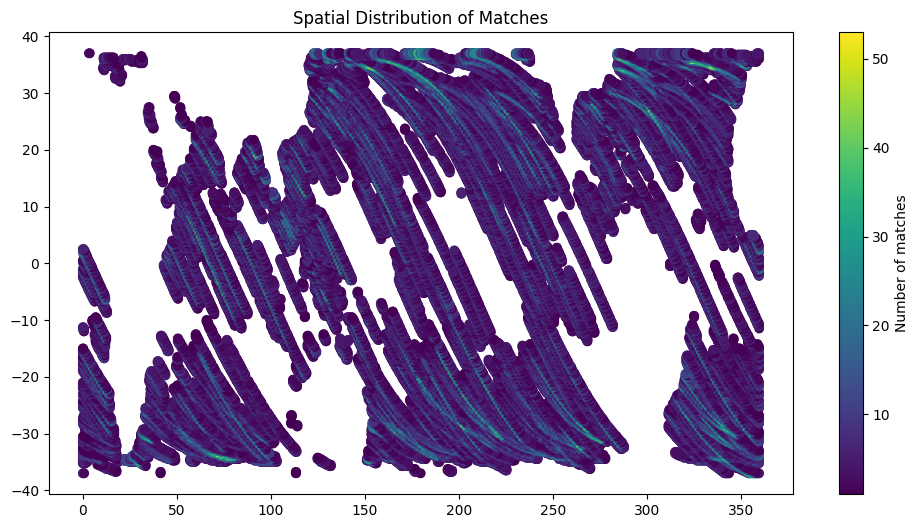

In [19]:
# Check distribution of num_matches
matched_df['num_matches'].describe()

# Check for potential spatial bias in matching
plt.figure(figsize=(12, 6))
plt.scatter(matched_df['lon'], matched_df['lat'], c=matched_df['num_matches'], cmap='viridis')
plt.colorbar(label='Number of matches')
plt.title('Spatial Distribution of Matches')


Preliminary Assessment for Regression

Text(0.5, 1.0, 'Correlation Matrix of Variables')

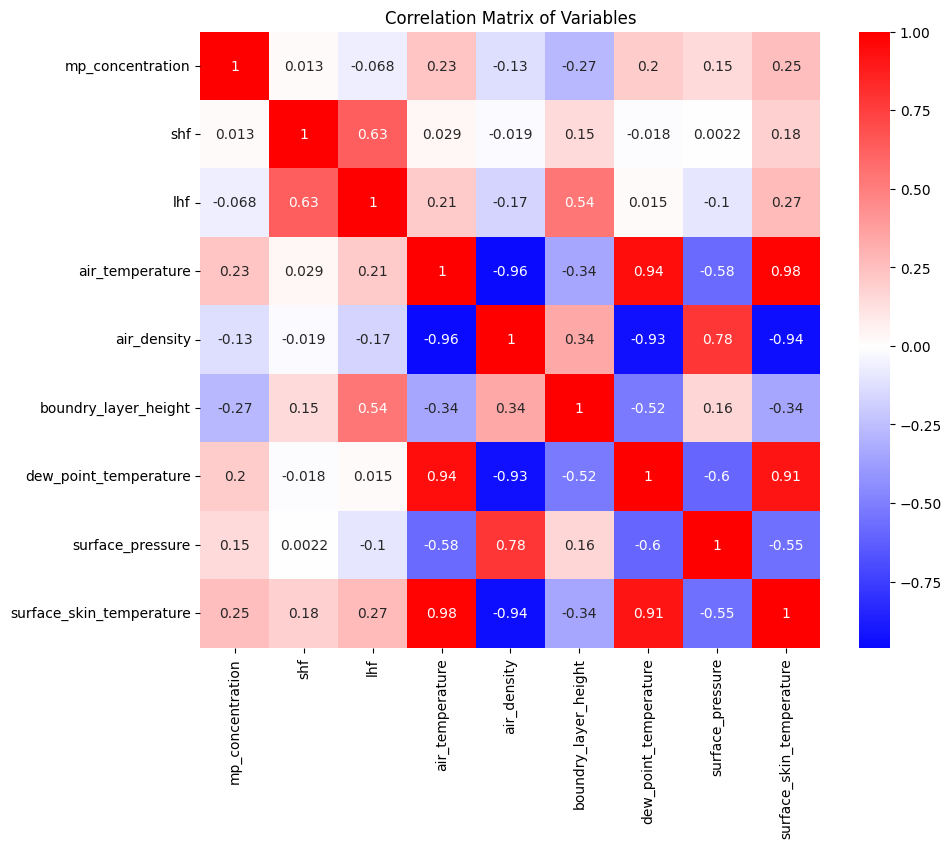

In [20]:
# Select variables for analysis
analysis_vars = ['mp_concentration', 'shf', 'lhf', 'air_temperature', 'air_density', 
                'boundry_layer_height', 'dew_point_temperature', 'surface_pressure', 'surface_skin_temperature']
# Create correlation matrix
correlation_matrix = matched_df[analysis_vars].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', center=0)
plt.title('Correlation Matrix of Variables')


air_temperature is higly correlated to 
- surface_skin_temperature, (0.98)
- dew_point_temperature (0.94), and 
- air_density (-0.96)

action: 
- keep air_temperature
- remove the three higly correlated element 
- should we keep both lhf and shf given correlation (0.63?)

Text(0.5, 1.0, 'Correlation Matrix of Variables')

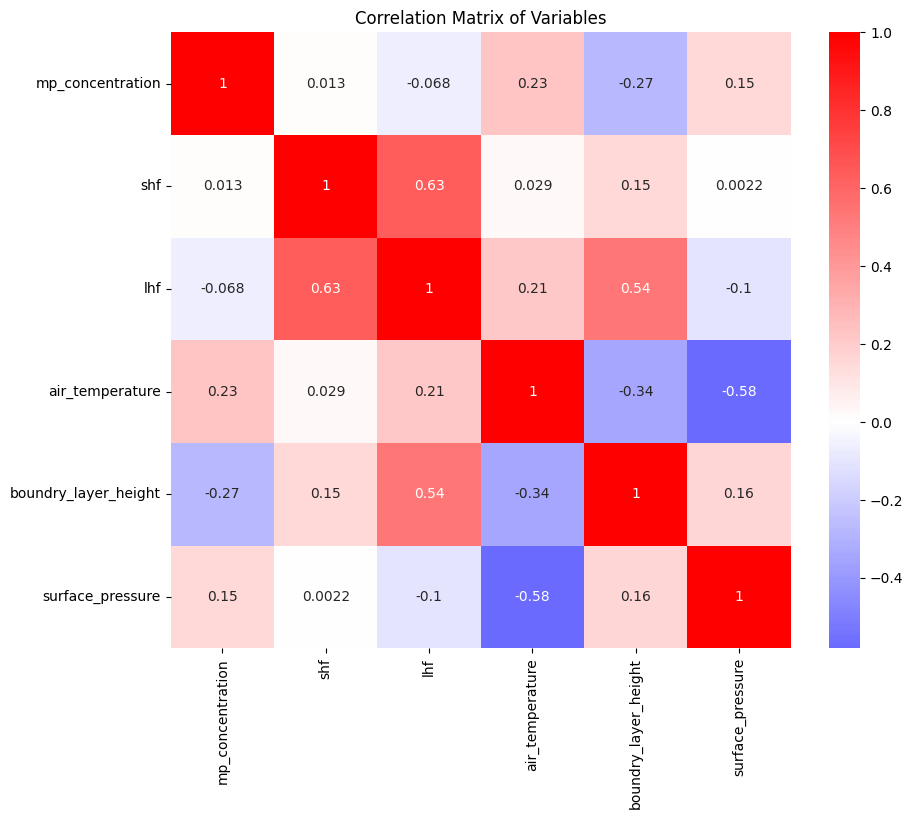

In [21]:
# Select variables for analysis
analysis_vars = ['mp_concentration', 'shf', 'lhf', 'air_temperature',
                'boundry_layer_height', 'surface_pressure']
# Create correlation matrix
correlation_matrix = matched_df[analysis_vars].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', center=0)
plt.title('Correlation Matrix of Variables')


In [22]:
matched_df

,lat,lon,mp_concentration,shf,lhf,air_temperature,air_density,boundry_layer_height,dew_point_temperature,surface_pressure,surface_skin_temperature,num_matches
0,-37.0,0.00,12866.504883,7.869692,61.020660,284.697784,1.255203,1223.318970,278.731964,102938.562500,285.720184,3
1,-37.0,0.25,12746.297852,8.398616,61.663864,284.636871,1.255268,1230.951416,278.732025,102927.625000,285.715485,6
2,-37.0,0.50,12626.090820,9.141449,60.806480,284.537018,1.255375,1249.711426,278.712921,102910.570312,285.738495,5
3,-37.0,0.75,12505.883789,9.462316,58.555595,284.478577,1.255438,1266.402832,278.684204,102901.421875,285.780090,2
4,-37.0,41.25,12102.434570,4.967390,55.667912,288.956116,1.222663,454.008972,284.299286,102124.921875,289.674286,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110136,37.0,358.75,13963.895508,3.237236,99.197060,299.409607,1.166104,579.020691,295.895813,101434.828125,299.751923,7
110137,37.0,359.00,14053.669922,3.964808,107.239685,299.421722,1.165893,573.496460,295.736755,101402.492188,299.830933,5
110138,37.0,359.25,13929.945312,4.903421,115.906029,299.381805,1.165994,548.274475,295.685791,101400.406250,299.853546,3
110139,37.0,359.50,13806.220703,6.600836,128.495941,299.299316,1.166420,485.089478,295.705750,101447.281250,299.870544,4


Note 1 - normalization 
Note 2 - keeping the previous index to align results 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import numpy as np

# Prepare X (features) and y (target)
X = matched_df_clean[['shf', 'lhf', 'air_temperature', 
                      'boundry_layer_height', 'surface_pressure']]
y = matched_df_clean['mp_concentration']

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# 1. Linear Regression with scaled data
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)

# 2. OLS with scaled data (adding constant)
X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)
model_ols = sm.OLS(y_train, X_train_const).fit()
y_pred_ols = model_ols.predict(X_test_const)
r2_ols = r2_score(y_test, y_pred_ols)

# Compare results
print("Comparison of Models with Scaled Data:")
print("\nR-squared values:")
print(f"LinearRegression: {r2_lr:.4f}")
print(f"OLS: {r2_ols:.4f}")

print("\nCoefficients comparison:")
print("\nLinearRegression coefficients:")
for feature, coef in zip(X_train_scaled.columns, model_lr.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model_lr.intercept_:.4f}")

print("\nOLS coefficients:")
for feature, coef in zip(['const'] + list(X_train_scaled.columns), model_ols.params):
    print(f"{feature}: {coef:.4f}")

# Compare predictions
print("\nPrediction correlation:")
correlation = np.corrcoef(y_pred_lr, y_pred_ols)[0,1]
print(f"Correlation between predictions: {correlation:.4f}")



Comparison of Models with Scaled Data:

R-squared values:
LinearRegression: 0.2094
OLS: 0.2094

Coefficients comparison:

LinearRegression coefficients:
shf: 47.6198
lhf: -45.1011
air_temperature: 270.1691
boundry_layer_height: -110.2684
surface_pressure: 265.7294
Intercept: 13061.6904

OLS coefficients:
const: 13061.6905
shf: 47.6198
lhf: -45.1012
air_temperature: 270.1691
boundry_layer_height: -110.2684
surface_pressure: 265.7293

Prediction correlation:
Correlation between predictions: 1.0000


In [24]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       mp_concentration   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4650.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:03:49   Log-Likelihood:            -6.7819e+05
No. Observations:               87303   AIC:                         1.356e+06
Df Residuals:                   87297   BIC:                         1.356e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.306e+04 

In [25]:
print(y_test, y_pred_ols)

81812     13609.416992
74279     12326.130859
45206     13150.622070
13289     12643.712891
107318    12293.487305
              ...     
42499     13404.266602
23131     12878.358398
14841     12923.580078
30507     13144.780273
19741     12600.708008
Name: mp_concentration, Length: 21826, dtype: float64 81812     13450.597401
74279     12972.913637
45206     13004.009223
13289     12519.239617
107318    12970.202221
              ...     
42499     13244.884767
23131     12760.950994
14841     12952.645907
30507     13005.275428
19741     12899.190211
Length: 21826, dtype: float64


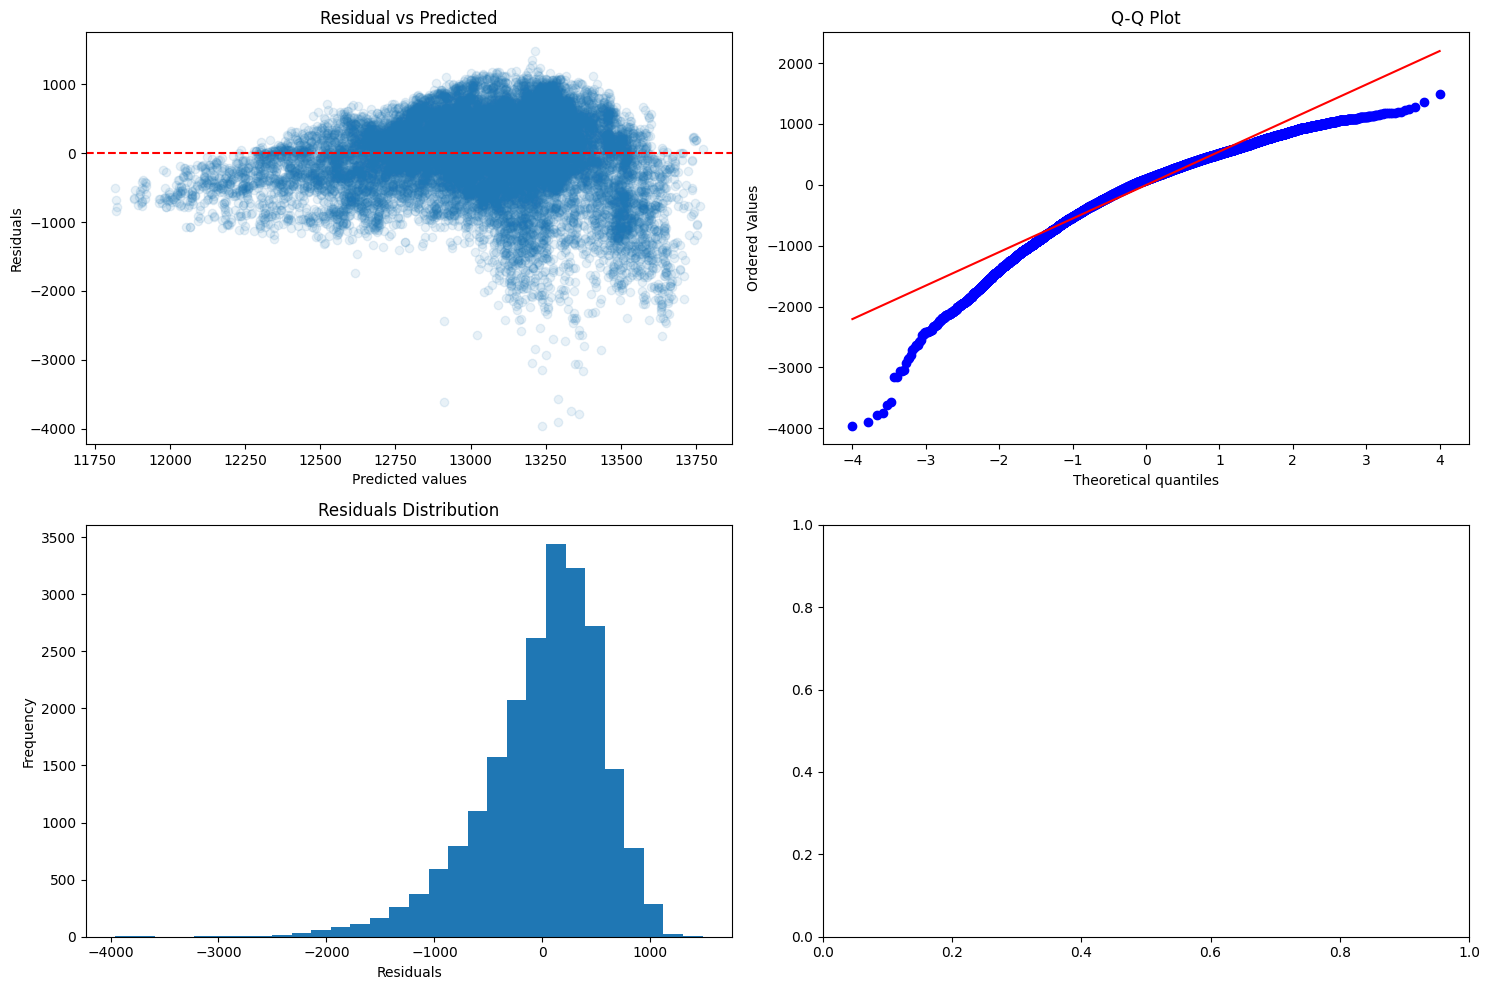

In [26]:
# Enhanced residual plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

y_pred = model_ols.predict(X_test_const)
residuals = y_pred - y_test

# Standard residual plot
axes[0,0].scatter(y_pred, residuals, alpha=0.1)
axes[0,0].axhline(y=0, color='r', linestyle='--')
axes[0,0].set_xlabel('Predicted values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residual vs Predicted')

# Q-Q plot for normality
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot')

# Residuals histogram
axes[1,0].hist(residuals, bins=30)
axes[1,0].set_xlabel('Residuals')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Residuals Distribution')

plt.tight_layout()
plt.show()

In [27]:
# Prepare X (features) and y (target)
X = matched_df_clean[['shf', 'lhf', 'air_temperature', 
                      'boundry_layer_height', 'surface_pressure']]
y_log = np.log1p(matched_df_clean['mp_concentration'])

# Split the scaled data
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)
model_ols = sm.OLS(y_train_log, X_train_const).fit()
y_pred_log = model_ols.predict(X_test_const)
r2_ols = r2_score(y_test_log, y_pred_log)

# Results
print("Comparison of Models with Scaled Data:")
print("\nR-squared values:")
print(f"OLS: {r2_ols:.4f}")


print("\nOLS coefficients:")
for feature, coef in zip(['const'] + list(X_train_scaled.columns), model_ols.params):
    print(f"{feature}: {coef:.4f}")



Comparison of Models with Scaled Data:

R-squared values:
OLS: 0.2108

OLS coefficients:
const: 9.4763
shf: 0.0035
lhf: -0.0032
air_temperature: 0.0198
boundry_layer_height: -0.0085
surface_pressure: 0.0199


In [28]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       mp_concentration   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4701.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:03:50   Log-Likelihood:             1.5191e+05
No. Observations:               87303   AIC:                        -3.038e+05
Df Residuals:                   87297   BIC:                        -3.037e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.4763 

In [29]:
print(y_test_log, y_pred_log)

81812     9.518591
74279     9.419558
45206     9.484300
13289     9.444994
107318    9.416906
            ...   
42499     9.503403
23131     9.463381
14841     9.466886
30507     9.483856
19741     9.441588
Name: mp_concentration, Length: 21826, dtype: float64 81812     9.505526
74279     9.469473
45206     9.471889
13289     9.436148
107318    9.469631
            ...   
42499     9.490017
23131     9.454046
14841     9.468647
30507     9.472284
19741     9.464386
Length: 21826, dtype: float64


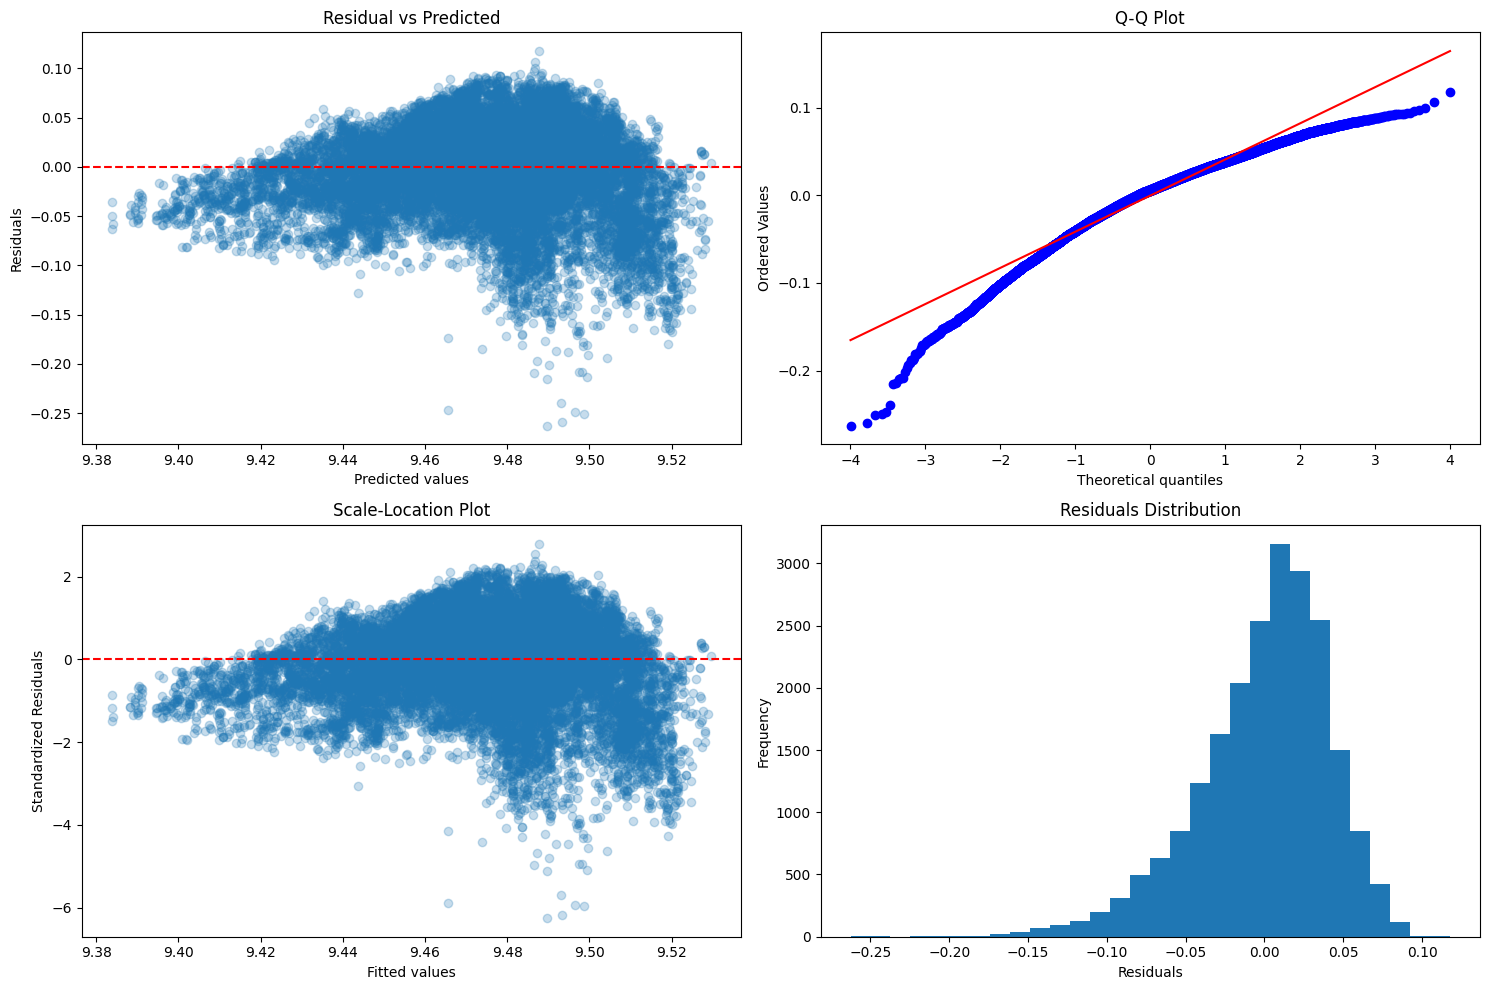

In [30]:
# Enhanced residual plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

residuals = y_pred_log - y_test_log

# Standard residual plot
axes[0,0].scatter(y_pred_log, residuals, alpha=0.25)
axes[0,0].axhline(y=0, color='r', linestyle='--')
axes[0,0].set_xlabel('Predicted values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residual vs Predicted')

# Q-Q plot for normality
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot')

# Standardized residuals vs Fitted
standardized_residuals = residuals / np.std(residuals)
axes[1,0].scatter(y_pred_log, standardized_residuals, alpha=0.25)
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Fitted values')
axes[1,0].set_ylabel('Standardized Residuals')
axes[1,0].set_title('Scale-Location Plot')

# Residuals histogram
axes[1,1].hist(residuals, bins=30)
axes[1,1].set_xlabel('Residuals')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Residuals Distribution')

plt.tight_layout()
plt.show()

Data Transformation to resolve heteroskedasticity

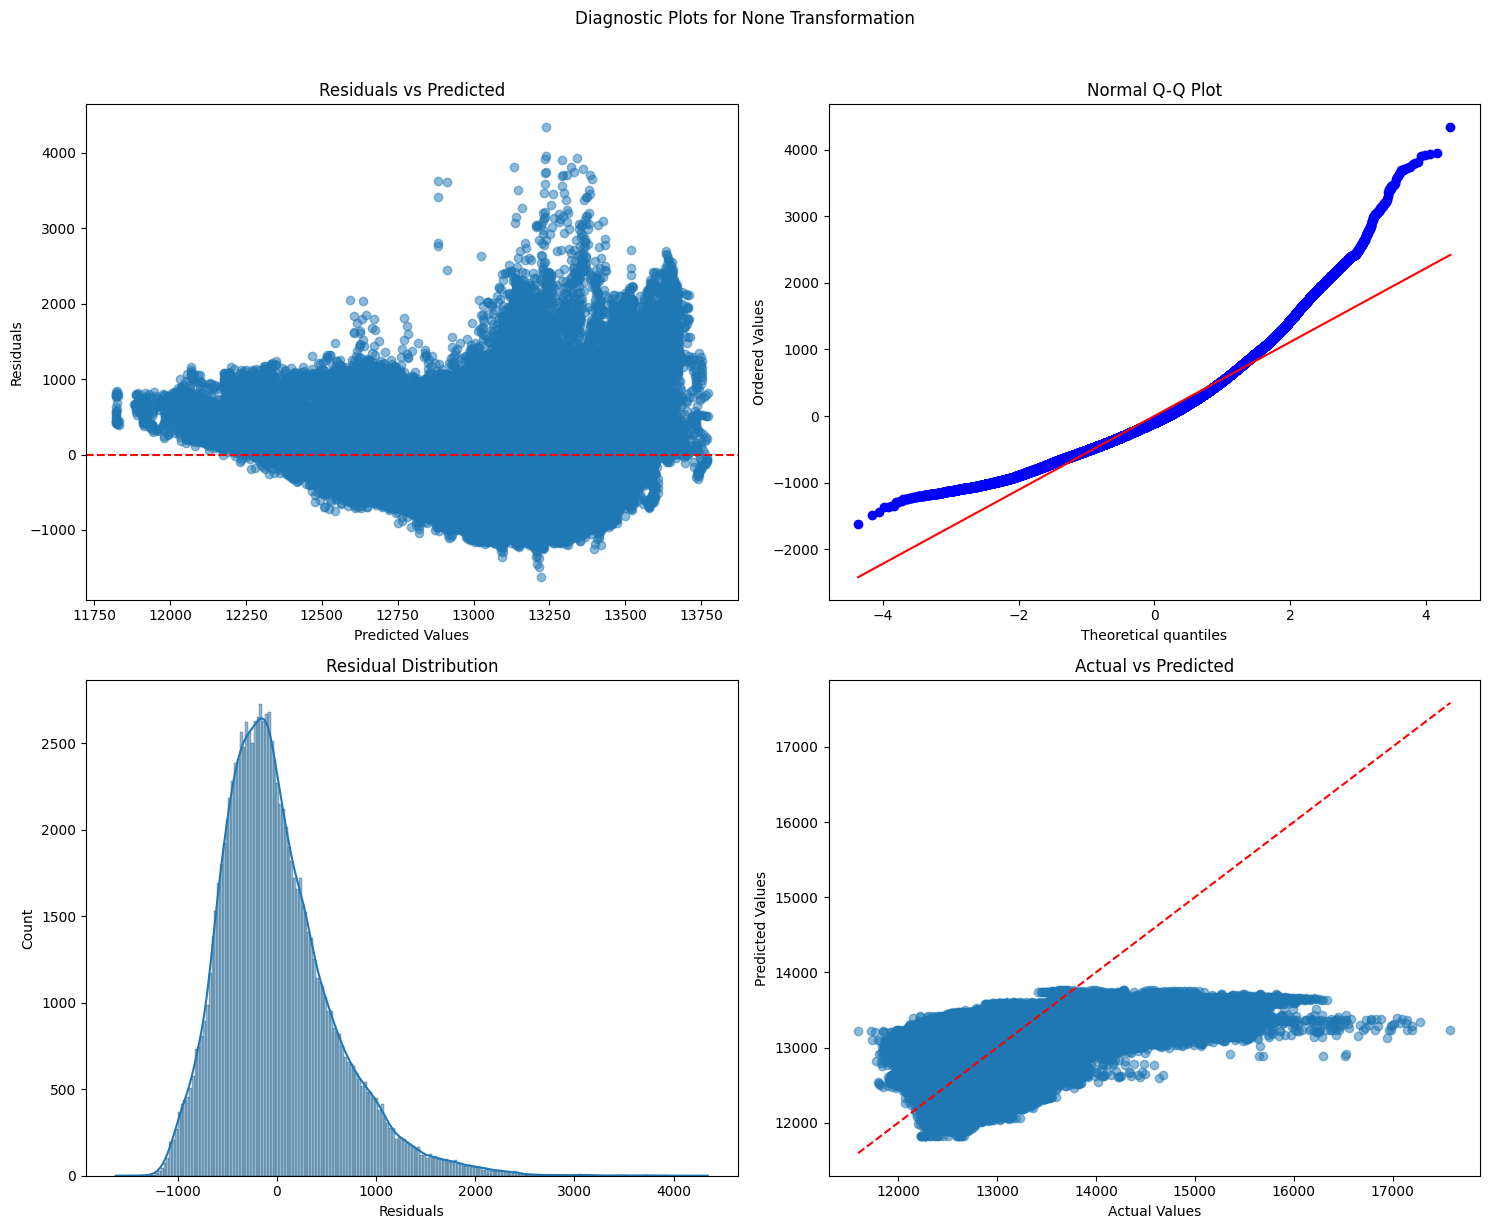


OLS Regression Results for None Transformation:
                            OLS Regression Results                            
Dep. Variable:       mp_concentration   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     5807.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:03:54   Log-Likelihood:            -8.4749e+05
No. Observations:              109129   AIC:                         1.695e+06
Df Residuals:                  109123   BIC:                         1.695e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

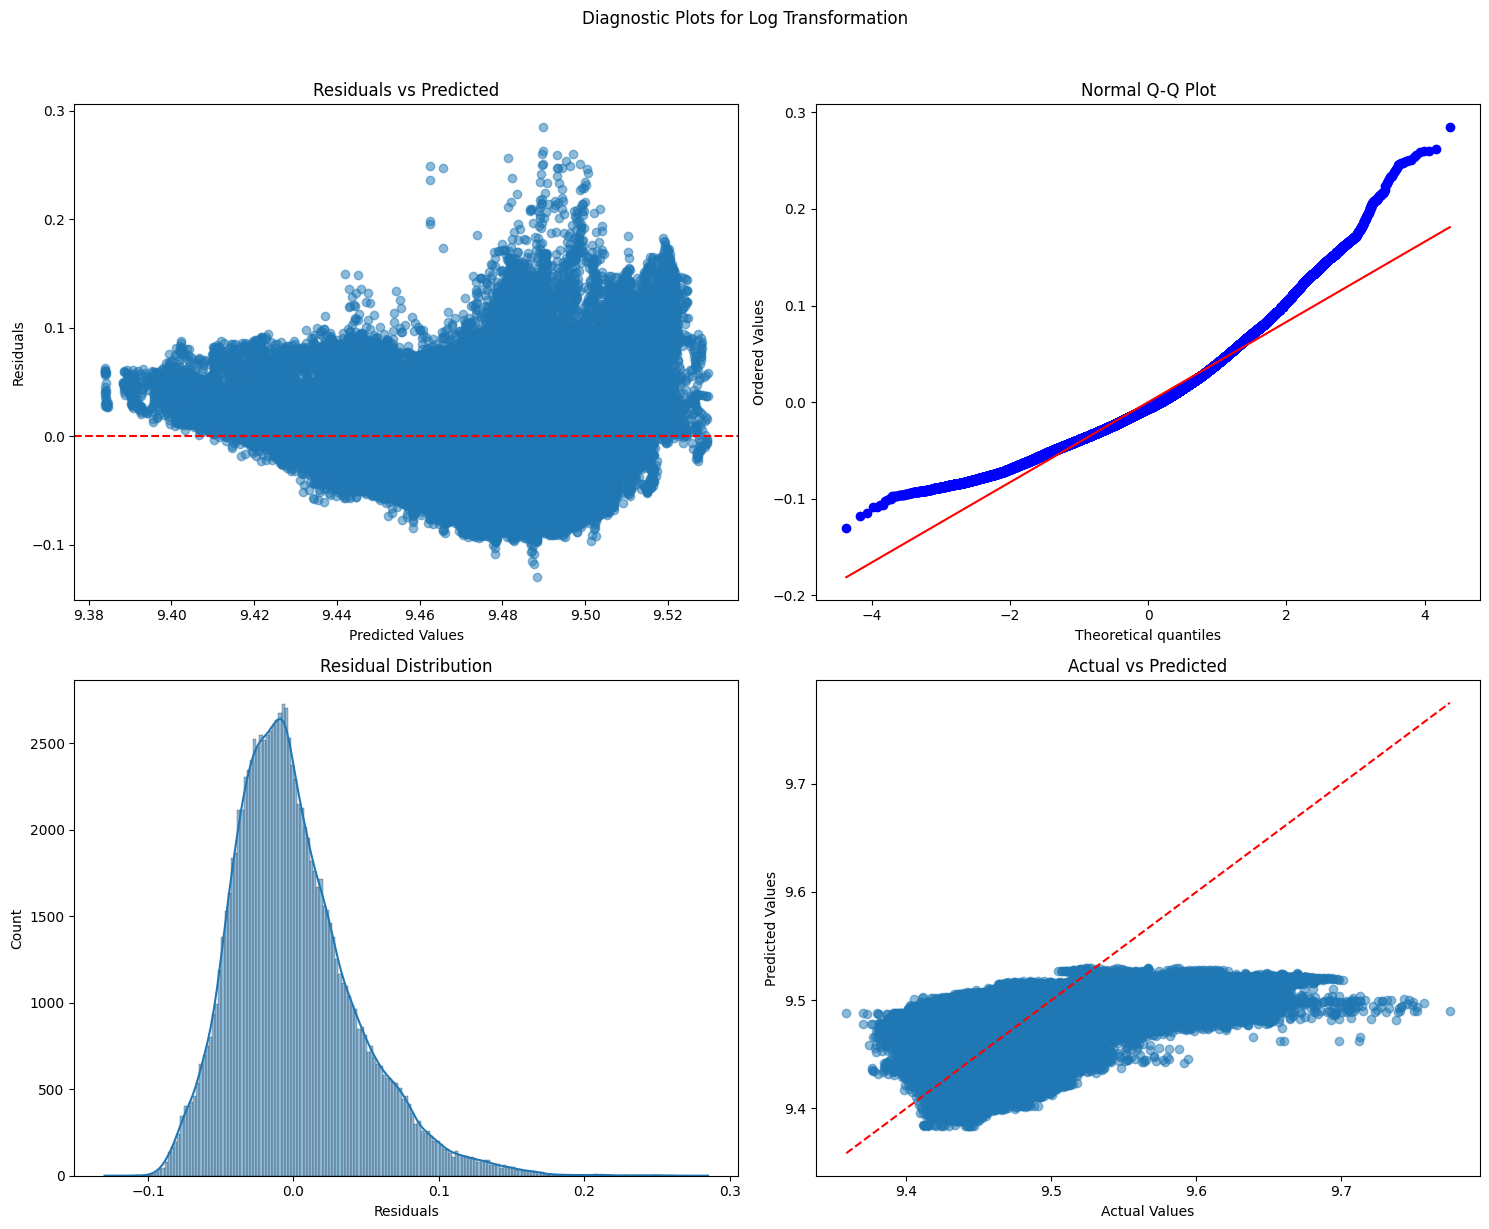


OLS Regression Results for Log Transformation:
                            OLS Regression Results                            
Dep. Variable:       mp_concentration   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     5867.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:03:57   Log-Likelihood:             1.9011e+05
No. Observations:              109129   AIC:                        -3.802e+05
Df Residuals:                  109123   BIC:                        -3.801e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

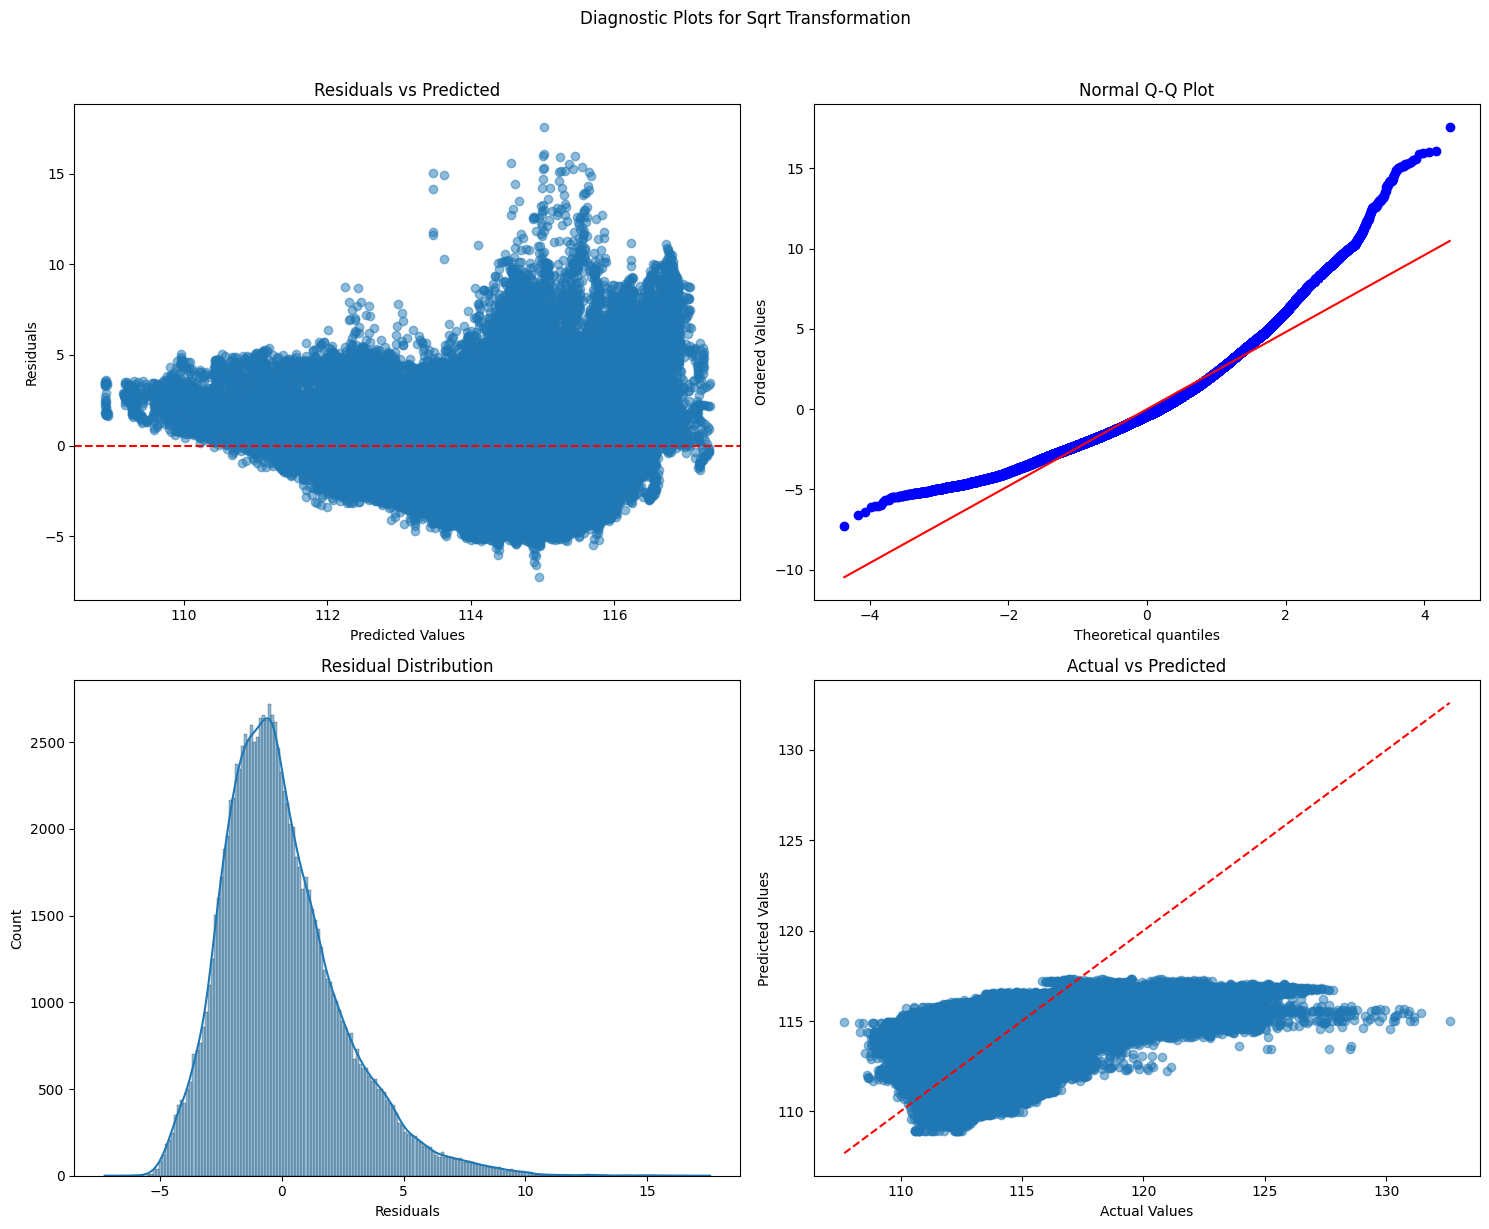


OLS Regression Results for Sqrt Transformation:
                            OLS Regression Results                            
Dep. Variable:       mp_concentration   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     5840.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:04:01   Log-Likelihood:            -2.5298e+05
No. Observations:              109129   AIC:                         5.060e+05
Df Residuals:                  109123   BIC:                         5.060e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

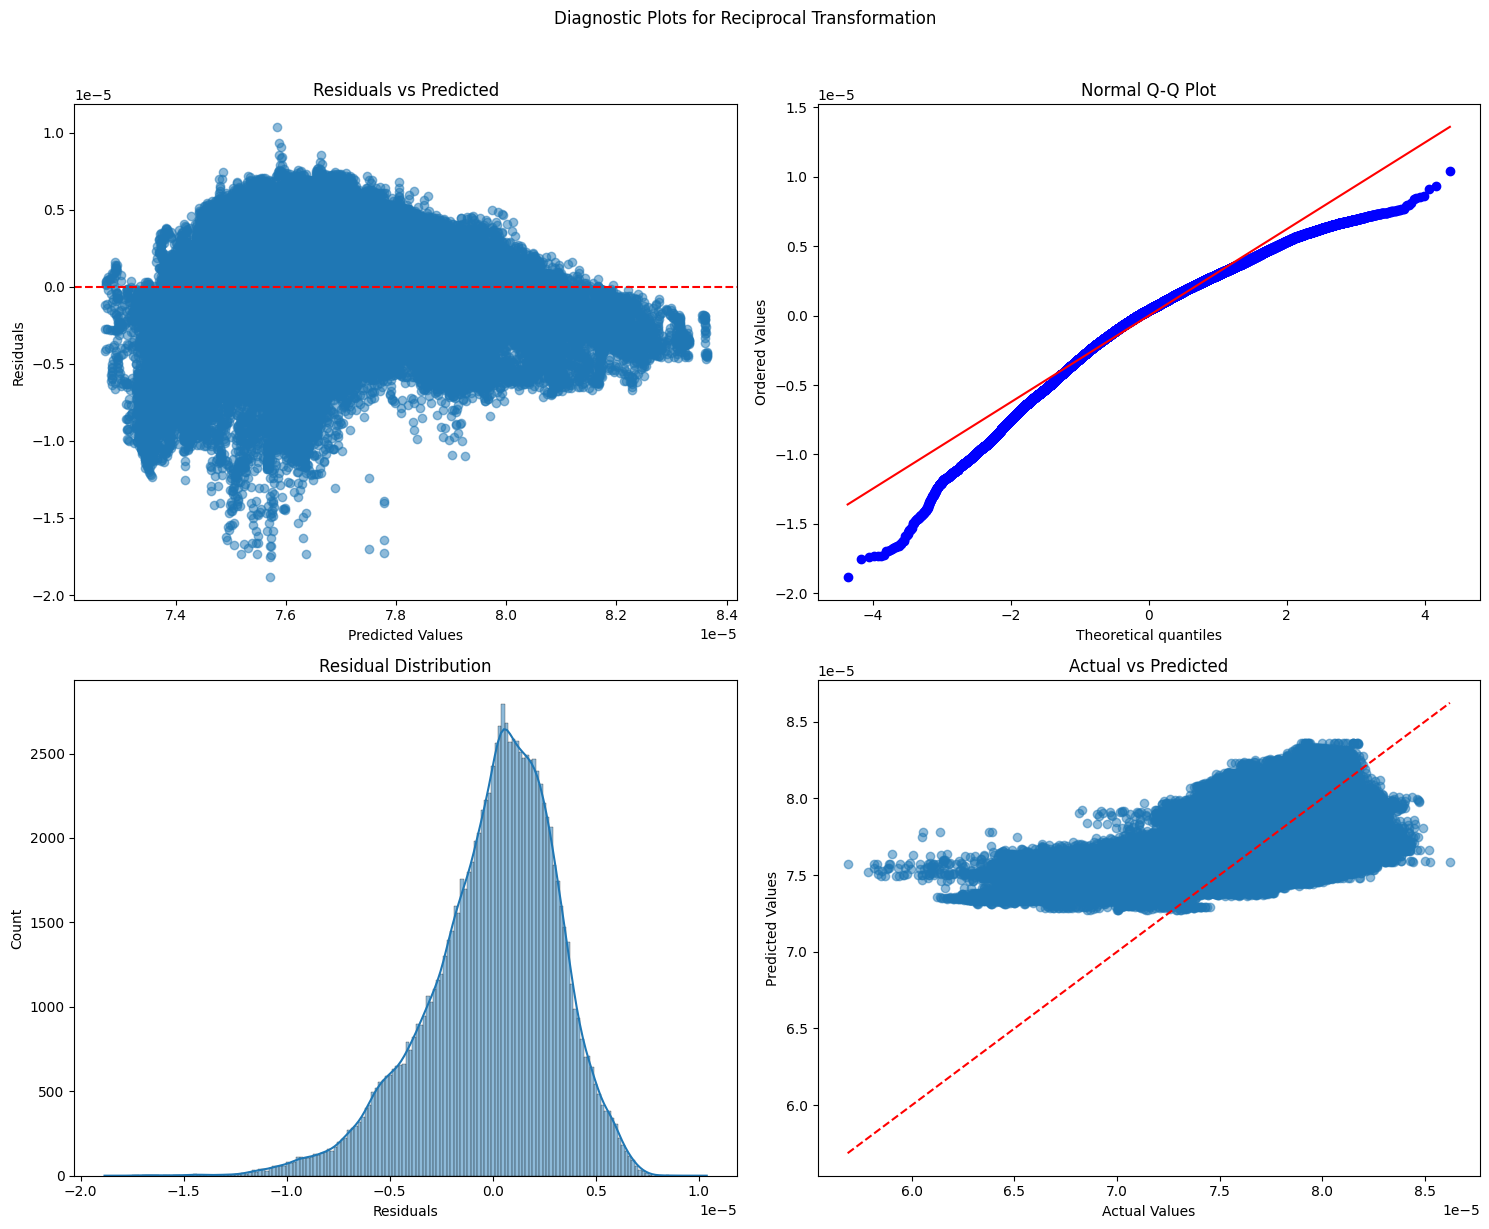


OLS Regression Results for Reciprocal Transformation:
                            OLS Regression Results                            
Dep. Variable:       mp_concentration   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     5905.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:04:05   Log-Likelihood:             1.2272e+06
No. Observations:              109129   AIC:                        -2.454e+06
Df Residuals:                  109123   BIC:                        -2.454e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [31]:
def plot_transformations(df, target_var, transformation_type, save_path='transformations.png'):
    """
    Create diagnostic plots for regression analysis with different transformations.
    
    Args:
        df: DataFrame containing the data
        target_var: Name of target variable (dependent variable)
        transformation_type: String indicating transformation ('none', 'log', 'sqrt', 'reciprocal')
        save_path: Path to save the plots
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.api as sm
    from scipy import stats
    
    # Define transformations
    transformations = {
        'none': lambda x: x,
        'log': lambda x: np.log1p(x),
        'sqrt': lambda x: np.sqrt(x),
        'reciprocal': lambda x: 1/(x + 1)
    }
    
    # Apply transformation
    if transformation_type not in transformations:
        raise ValueError(f"Transformation type must be one of {list(transformations.keys())}")
    
    y = transformations[transformation_type](df[target_var])
    X = df[['shf', 'lhf', 'air_temperature', 'boundry_layer_height', 'surface_pressure']]
    
    # Add constant and fit OLS model
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    # Get predictions and residuals
    y_pred = model.predict(X)
    residuals = model.resid
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Residuals vs Predicted Values
    axes[0,0].scatter(y_pred, residuals, alpha=0.5)
    axes[0,0].axhline(y=0, color='r', linestyle='--')
    axes[0,0].set_xlabel('Predicted Values')
    axes[0,0].set_ylabel('Residuals')
    axes[0,0].set_title('Residuals vs Predicted')
    
    # 2. QQ Plot
    stats.probplot(residuals, dist="norm", plot=axes[0,1])
    axes[0,1].set_title('Normal Q-Q Plot')
    
    # 3. Residual Distribution
    sns.histplot(residuals, kde=True, ax=axes[1,0])
    axes[1,0].set_title('Residual Distribution')
    axes[1,0].set_xlabel('Residuals')
    
    # 4. Actual vs Predicted
    axes[1,1].scatter(y, y_pred, alpha=0.5)
    min_val = min(min(y), min(y_pred))
    max_val = max(max(y), max(y_pred))
    axes[1,1].plot([min_val, max_val], [min_val, max_val], 'r--')
    axes[1,1].set_xlabel('Actual Values')
    axes[1,1].set_ylabel('Predicted Values')
    axes[1,1].set_title('Actual vs Predicted')
    
    # Add transformation type as suptitle
    plt.suptitle(f'Diagnostic Plots for {transformation_type.capitalize()} Transformation', y=1.02)
    plt.tight_layout()
    
    # Save plot
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print OLS Summary
    print(f"\nOLS Regression Results for {transformation_type.capitalize()} Transformation:")
    print(model.summary())
    
    return model

# Example usage:
# For original data
model_orig = plot_transformations(matched_df_clean, 'mp_concentration', 'none', 'original_diagnostics.png')

# For log transformation
model_log = plot_transformations(matched_df_clean, 'mp_concentration', 'log', 'log_diagnostics.png')

# For square root transformation
model_sqrt = plot_transformations(matched_df_clean, 'mp_concentration', 'sqrt', 'sqrt_diagnostics.png')

# For reciprocal transformation
model_recip = plot_transformations(matched_df_clean, 'mp_concentration', 'reciprocal', 'reciprocal_diagnostics.png')

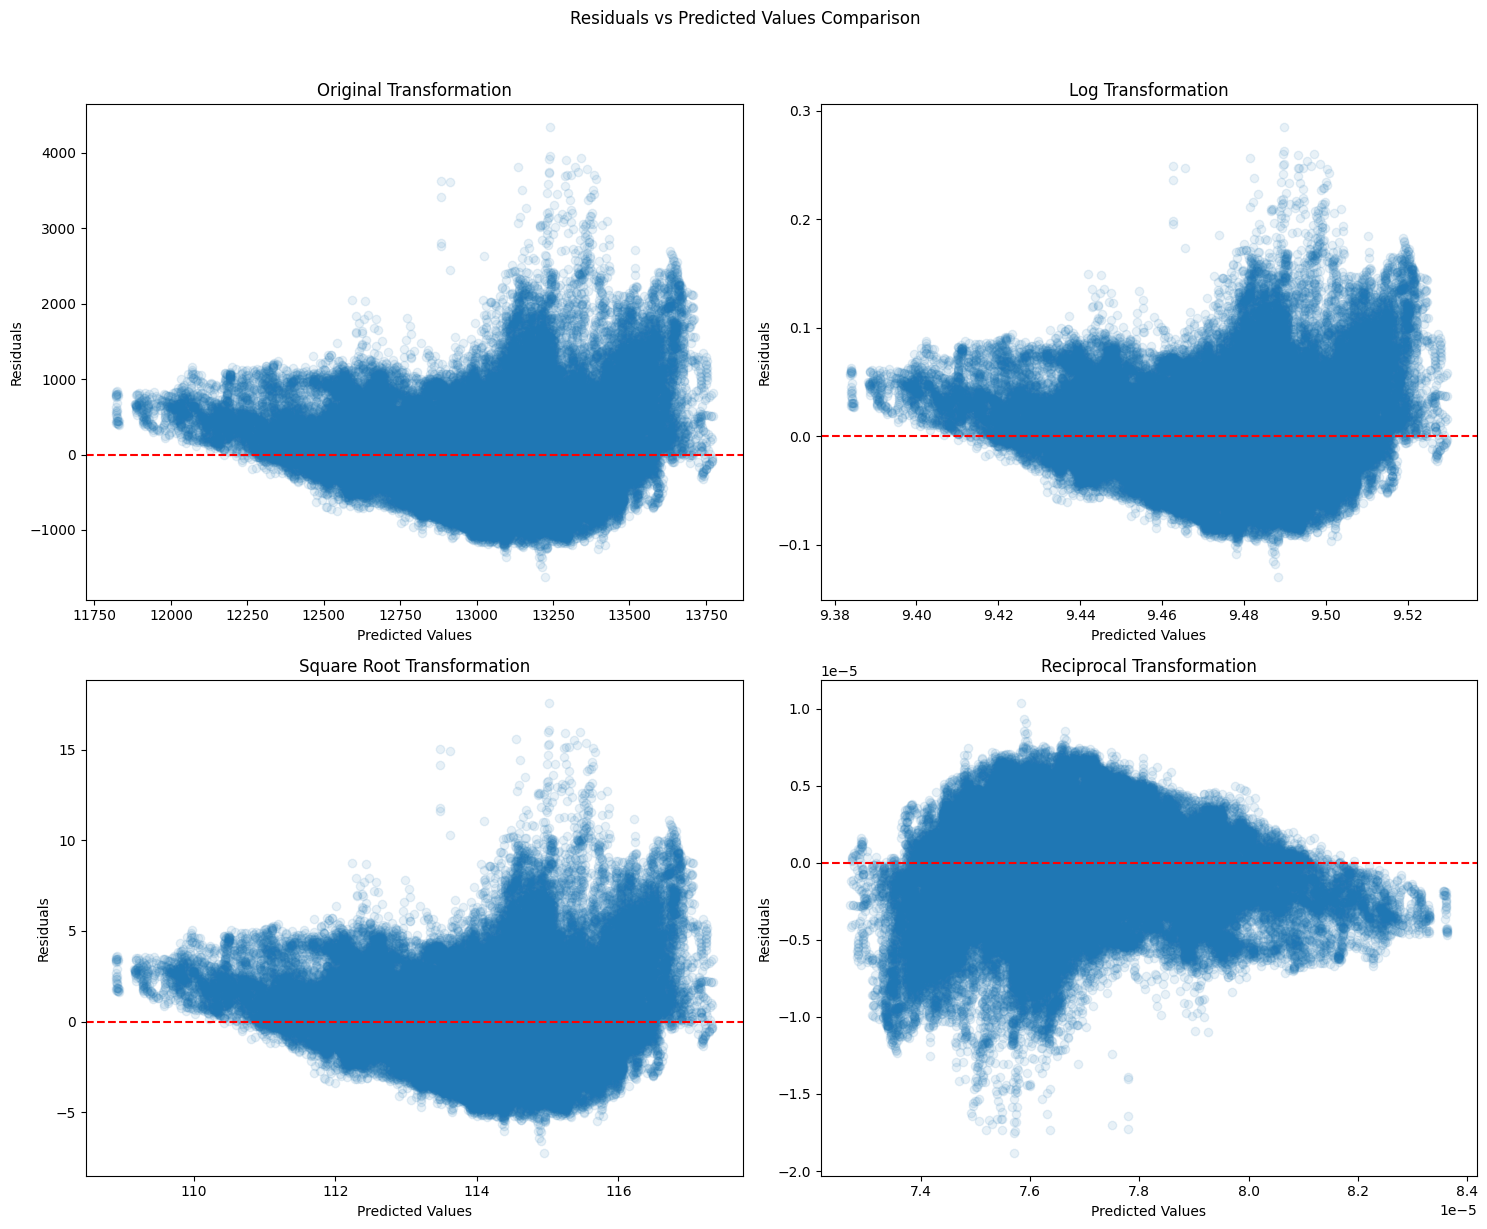

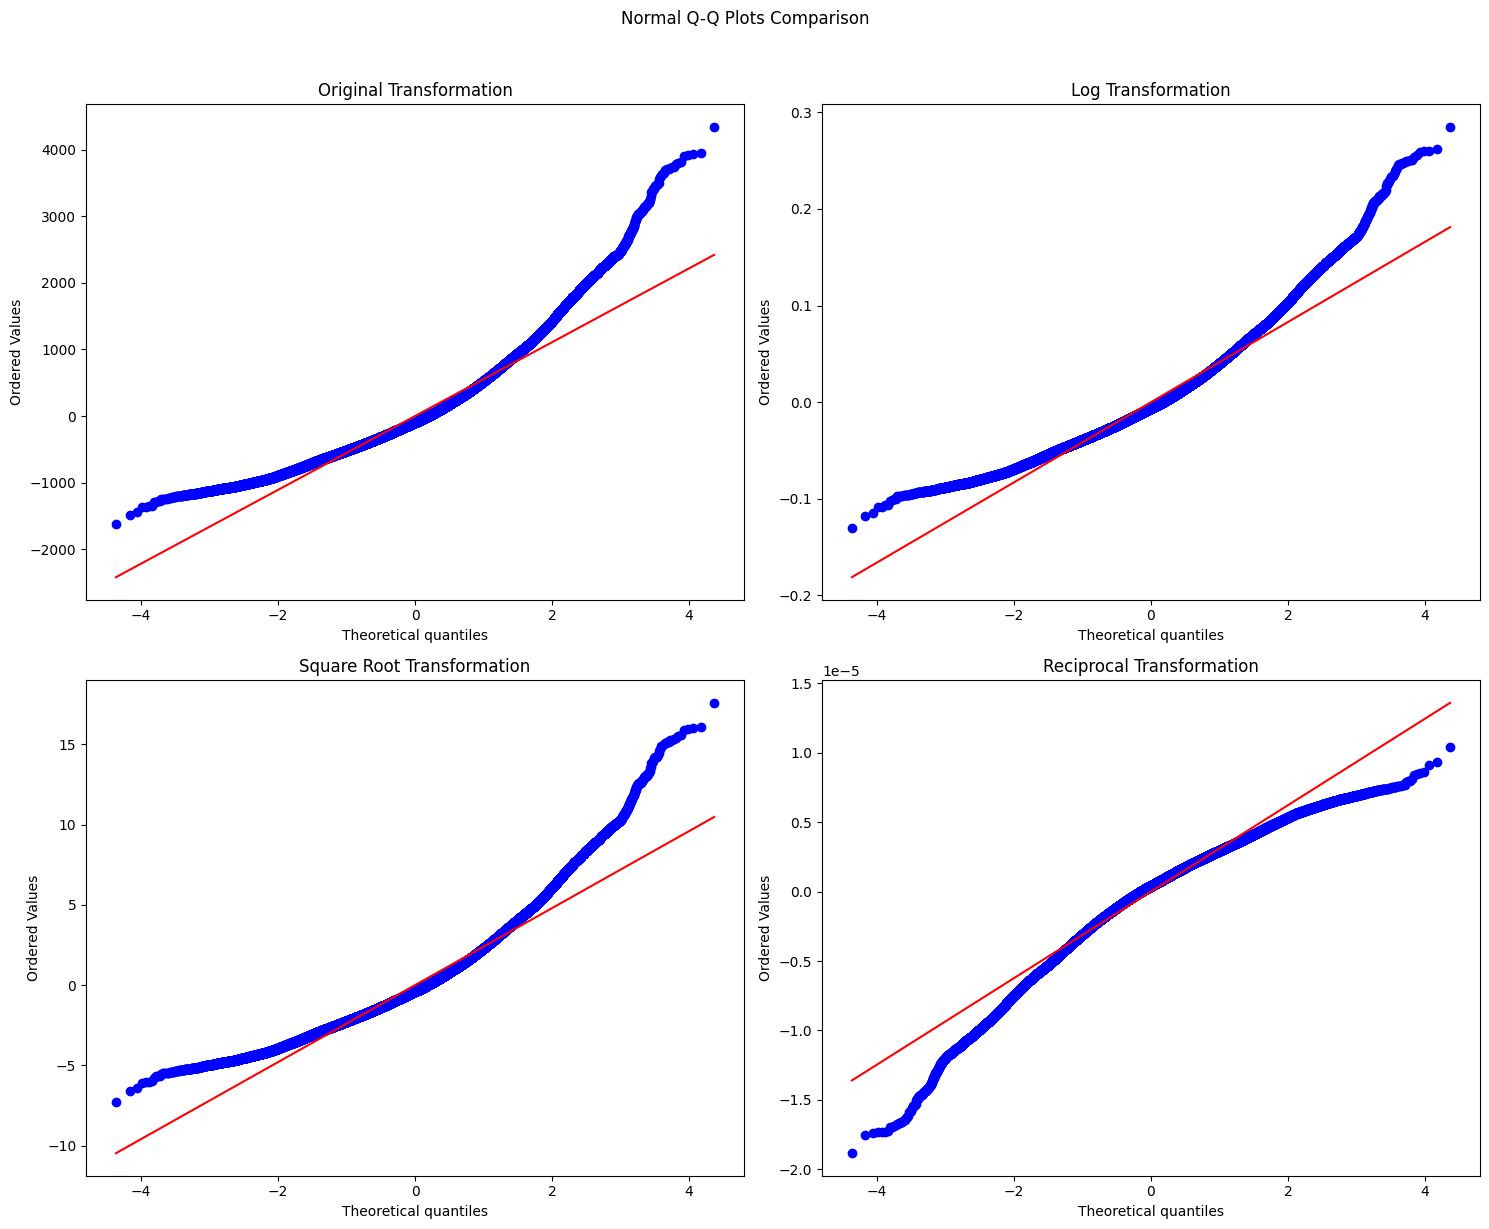

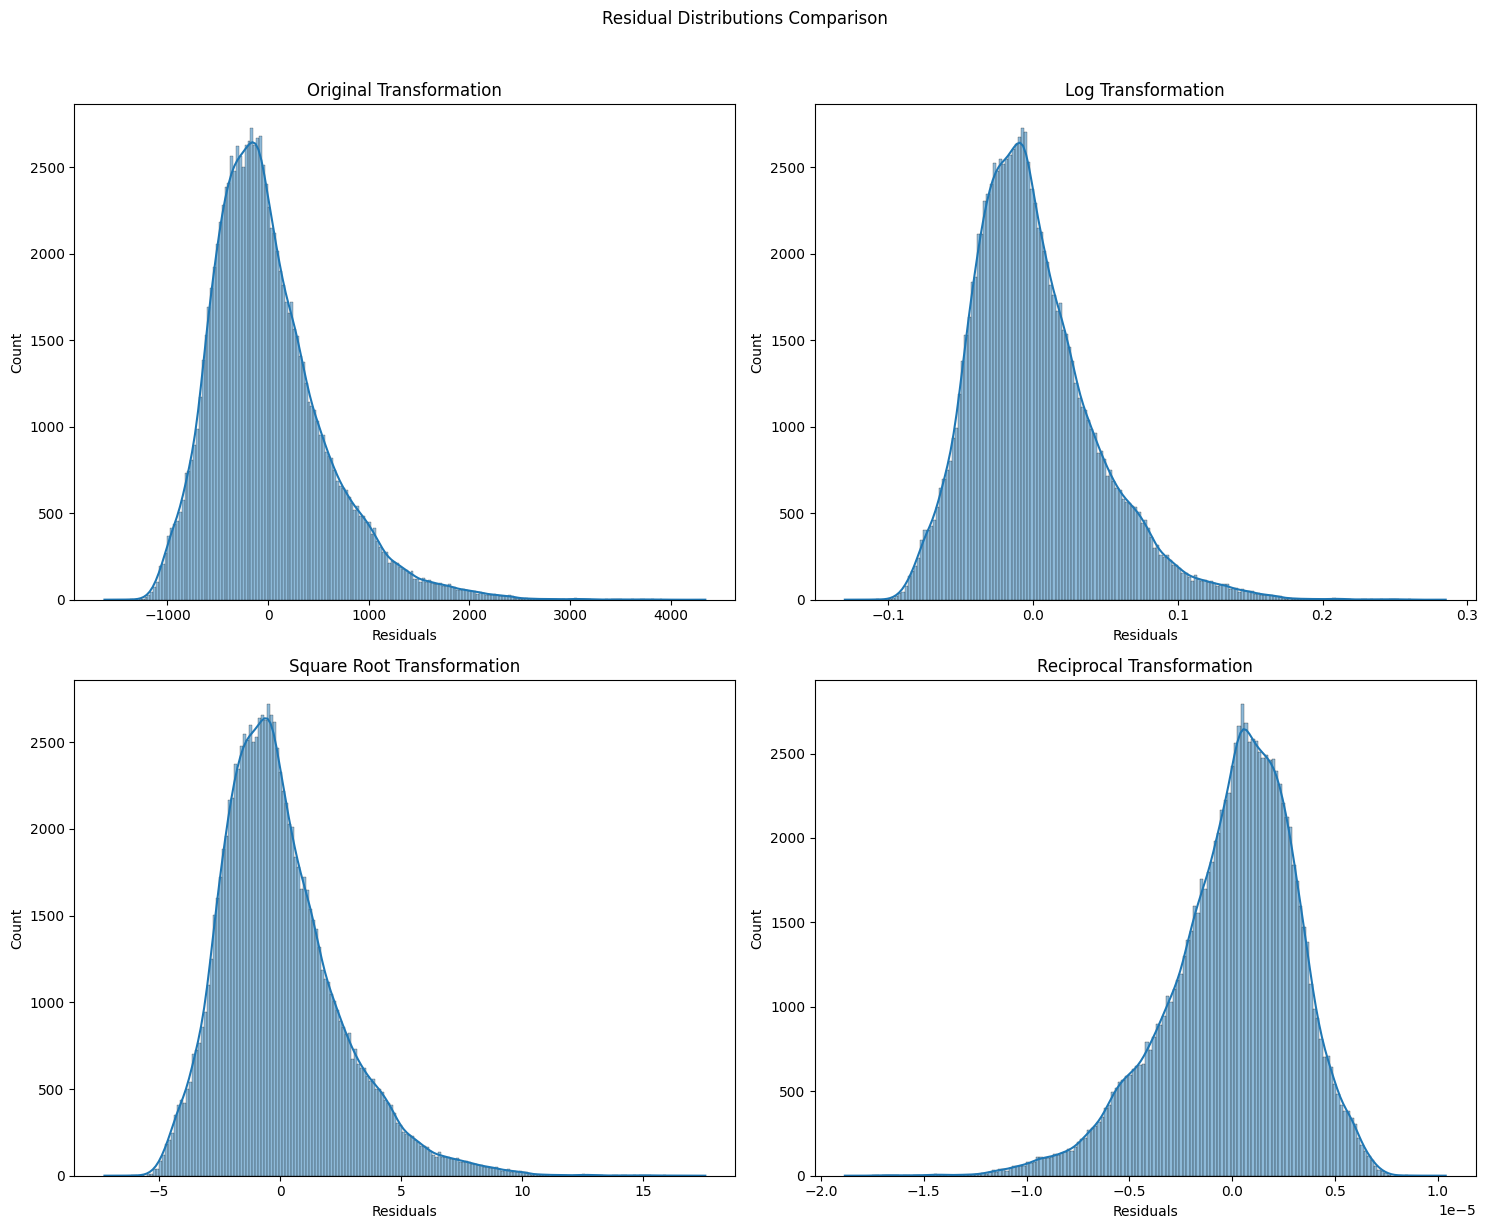


Model Summary Statistics:

Original Transformation:
R-squared: 0.2101
Adj. R-squared: 0.2101
AIC: 1694982.2304
BIC: 1695039.8321

Log Transformation:
R-squared: 0.2119
Adj. R-squared: 0.2118
AIC: -380200.5521
BIC: -380142.9504

Square Root Transformation:
R-squared: 0.2111
Adj. R-squared: 0.2111
AIC: 505979.8154
BIC: 506037.4171

Reciprocal Transformation:
R-squared: 0.2130
Adj. R-squared: 0.2129
AIC: -2454338.6320
BIC: -2454281.0302


In [38]:
def compare_transformations(df, target_var, save_path_prefix='transformation_comparison'):
    """
    Create comparison plots for different transformations side by side.
    
    Args:
        df: DataFrame containing the data
        target_var: Name of target variable (dependent variable)
        save_path_prefix: Prefix for saving the plots
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.api as sm
    from scipy import stats
    
    # Define transformations
    transformations = {
        'Original': lambda x: x,
        'Log': lambda x: np.log1p(x),
        'Square Root': lambda x: np.sqrt(x),
        'Reciprocal': lambda x: 1/(x + 1)
    }
    
    # Store results
    results = {}
    
    # Fit models for each transformation
    for name, transform in transformations.items():
        y = transform(df[target_var])
        X = df[['shf', 'lhf', 'air_temperature', 'boundry_layer_height', 'surface_pressure']]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        results[name] = {
            'model': model,
            'y_pred': model.predict(X),
            'residuals': model.resid,
            'y_true': y
        }
    
    # 1. Residuals vs Predicted (2x2 subplot)
    fig1, axes1 = plt.subplots(2, 2, figsize=(15, 12))
    axes1 = axes1.ravel()
    
    for idx, (name, res) in enumerate(results.items()):
        axes1[idx].scatter(res['y_pred'], res['residuals'], alpha=0.1)
        axes1[idx].axhline(y=0, color='r', linestyle='--')
        axes1[idx].set_xlabel('Predicted Values')
        axes1[idx].set_ylabel('Residuals')
        axes1[idx].set_title(f'{name} Transformation')
    
    plt.suptitle('Residuals vs Predicted Values Comparison', y=1.02)
    plt.tight_layout()
    plt.savefig(f'{save_path_prefix}_residuals.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. QQ Plots (2x2 subplot)
    fig2, axes2 = plt.subplots(2, 2, figsize=(15, 12))
    axes2 = axes2.ravel()
    
    for idx, (name, res) in enumerate(results.items()):
        stats.probplot(res['residuals'], dist="norm", plot=axes2[idx])
        axes2[idx].set_title(f'{name} Transformation')
    
    plt.suptitle('Normal Q-Q Plots Comparison', y=1.02)
    plt.tight_layout()
    plt.savefig(f'{save_path_prefix}_qq.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. Residual Distributions (2x2 subplot)
    fig3, axes3 = plt.subplots(2, 2, figsize=(15, 12))
    axes3 = axes3.ravel()
    
    for idx, (name, res) in enumerate(results.items()):
        sns.histplot(res['residuals'], kde=True, ax=axes3[idx])
        axes3[idx].set_title(f'{name} Transformation')
        axes3[idx].set_xlabel('Residuals')
    
    plt.suptitle('Residual Distributions Comparison', y=1.02)
    plt.tight_layout()
    plt.savefig(f'{save_path_prefix}_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary statistics
    print("\nModel Summary Statistics:")
    for name, res in results.items():
        print(f"\n{name} Transformation:")
        print(f"R-squared: {res['model'].rsquared:.4f}")
        print(f"Adj. R-squared: {res['model'].rsquared_adj:.4f}")
        print(f"AIC: {res['model'].aic:.4f}")
        print(f"BIC: {res['model'].bic:.4f}")
    
    return results

# Usage
results = compare_transformations(matched_df_clean, 'mp_concentration')

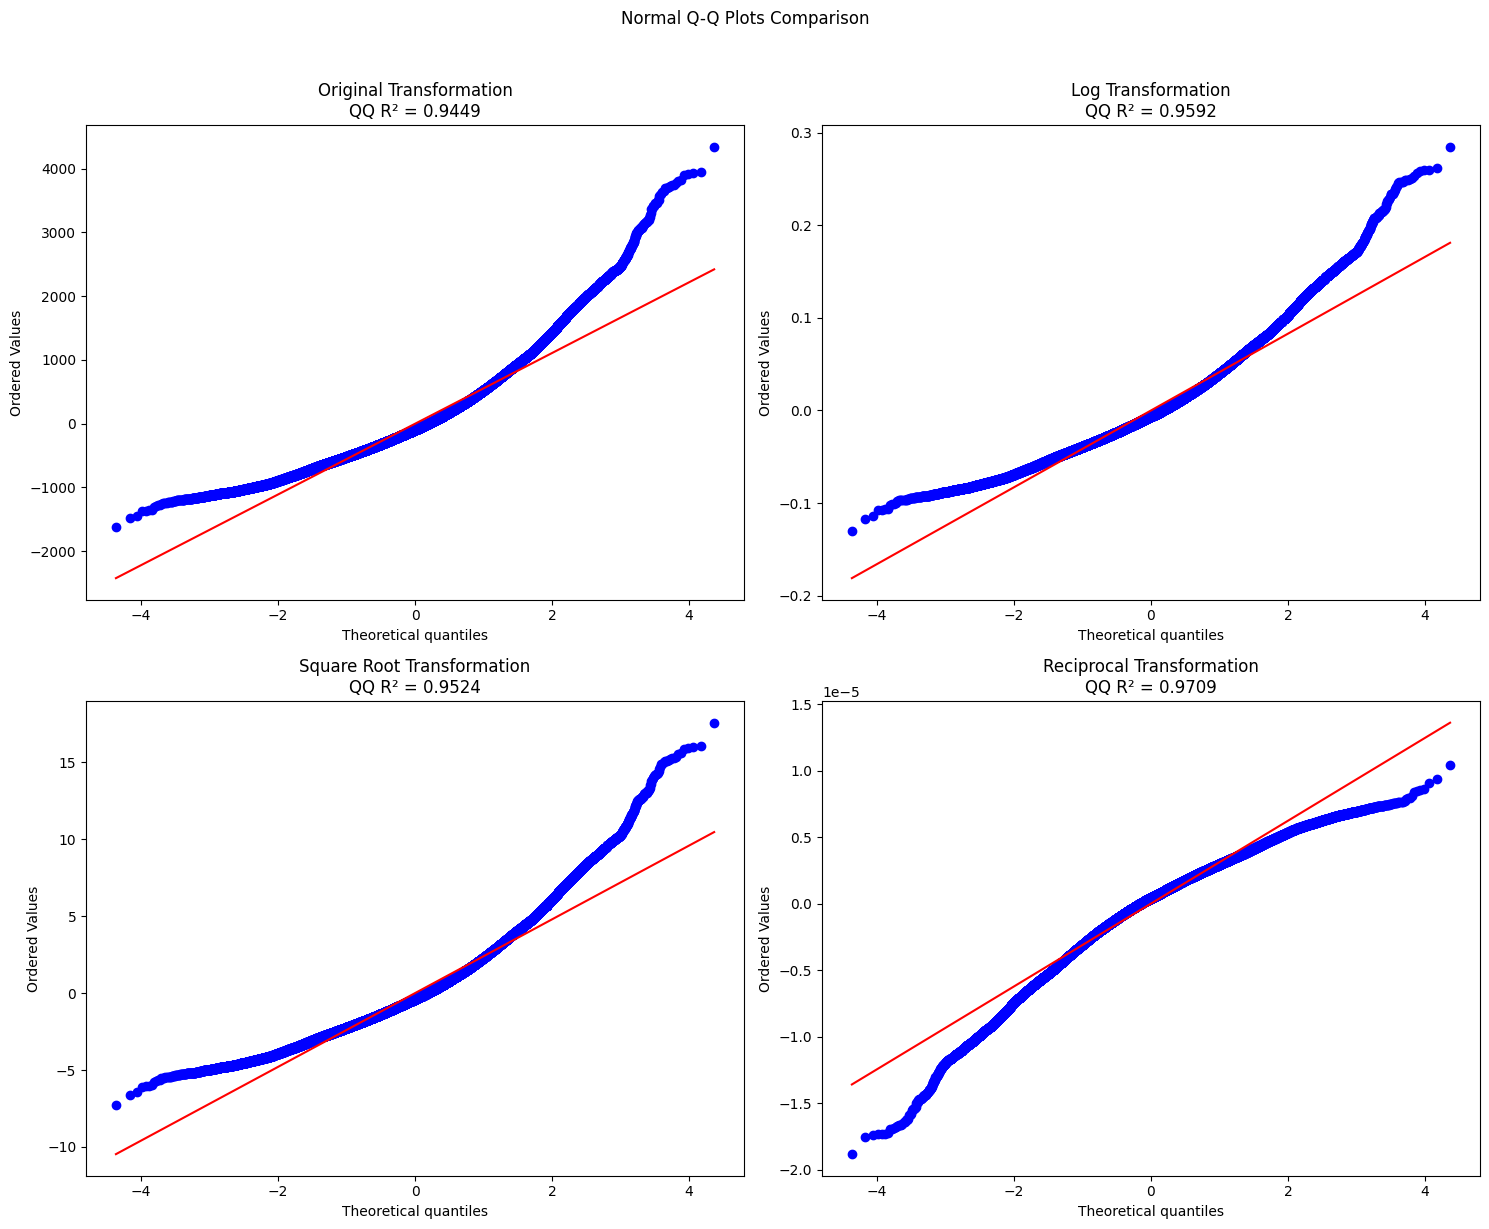


Q-Q Plot R² Values:
Original: 0.9449
Log: 0.9592
Square Root: 0.9524
Reciprocal: 0.9709


In [37]:
def calculate_qq_r2(residuals):
    """
    Calculate R² for Q-Q plot
    
    Args:
        residuals: Model residuals
    Returns:
        R² value for Q-Q plot
    """
    # Get theoretical and sample quantiles from probability plot
    qq_points = stats.probplot(residuals, dist="norm")
    theoretical_quantiles = qq_points[0][0]  # x-axis values
    sample_quantiles = qq_points[0][1]      # y-axis values
    
    # Calculate R² using correlation coefficient squared
    r2 = np.corrcoef(theoretical_quantiles, sample_quantiles)[0,1]**2
    
    return r2

# Modify the comparison function to show QQ R² values
def compare_transformations(df, target_var, save_path_prefix='transformation_comparison'):
    """
    Create comparison plots with QQ R² values
    """
    transformations = {
        'Original': lambda x: x,
        'Log': lambda x: np.log1p(x),
        'Square Root': lambda x: np.sqrt(x),
        'Reciprocal': lambda x: 1/(x + 1)
    }
    
    # Create QQ plots with R² values
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    results = {}
    
    for idx, (name, transform) in enumerate(transformations.items()):
        # Fit model and get residuals
        y = transform(df[target_var])
        X = df[['shf', 'lhf', 'air_temperature', 'boundry_layer_height', 'surface_pressure']]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        residuals = model.resid
        
        # Calculate QQ R²
        qq_r2 = calculate_qq_r2(residuals)
        
        # Create QQ plot
        stats.probplot(residuals, dist="norm", plot=axes[idx])
        axes[idx].set_title(f'{name} Transformation\nQQ R² = {qq_r2:.4f}')
        
        results[name] = {
            'qq_r2': qq_r2,
            'residuals': residuals,
            'model': model
        }
    
    plt.suptitle('Normal Q-Q Plots Comparison', y=1.02)
    plt.tight_layout()
    plt.savefig(f'{save_path_prefix}_qq.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary of R² values
    print("\nQ-Q Plot R² Values:")
    for name, res in results.items():
        print(f"{name}: {res['qq_r2']:.4f}")
    
    return results

# Use the function
results = compare_transformations(matched_df_clean, 'mp_concentration')